## Table of Contents <a name="content0"/>
1. [Import necessary libraries & Set required parameters](#content1)
2. [Data Sourcing & Understanding](#content2)
3. [Data Cleaning](#content3)
4. [Derived Metrics](#content4)
5. [Univariate Analysis](#content5)
<br/>    5.1 [Univariate Analysis on target feature](#content5_1)
<br/>    5.2 [Univariate Analysis on numeric](#content5_2)
<br/>    5.3 [Univariate Analysis on categorical](#content5_3)
6. [Bivariate Analysis](#content6)
7. [Data Preperation](#content7)
<br/>    7.1 [Dummy Variables](#content7_1)
<br/>    7.2 [Separate independent and dependent variables](#content7_2)
<br/>    7.3 [Splitting the Data into Train and Test Sets](#content7_3)
<br/>    7.4 [Feature Scaling](#content7_4)
8. [Ridge Regression (Regularisation)](#content8)
<br/>    8.1 [Building Model for Ridge Regression](#content8_1)
<br/>    8.2 [Building Model for Ridge Regression](#content8_2)
<br/>    8.3 [Building Model for Ridge Regression](#content8_3)
9. [Lasso Regression (Regularisation)](#content9)
<br/>    9.1 [Building Model for Ridge Regression](#content9_1)
<br/>    9.2 [Building Model for Ridge Regression](#content9_2)
<br/>    9.3 [Building Model for Ridge Regression](#content9_3)
10. [Evaluation Metrics for Ridge & Lasso](#content10)
11. [Conclusions](#content11)

## 1. Import necessary libraries & Set required parameters <a name="content1"/>

In [203]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Set display limits for rows & cols
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

[Back To Top🔝](#content0)
## 2. Data Sourcing & Understanding<a name="content2"/>

#### The following categorical columns have one level NA, which might be considered as missing value by pandas:-
    Alley : NA = No alley access
    BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement
    FireplaceQu : NA = No Fireplace
    GarageType, GarageFinish, GarageQual, GarageCond : NA = No Garage
    PoolQC : NA = No Pool
    Fence : NA = No Fence
    MiscFeature : NA = None
#### So, we will add keep_default to prevent to auto consideration of pandas for NA

In [204]:
# reading the dataset & adding keep_default to prevent to auto consideration of pandas for NA
df = pd.read_csv("train.csv", keep_default_na = False)
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [205]:
# Replacing all 'NA' of all above mentioned columns by 'None'
col_with_NA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df[col_with_NA] = df[col_with_NA].replace('NA', 'None')

In [206]:
#check data
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [207]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [208]:
#check the statistics of numerical features in data
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000"
mean,730.500,56.897,"10,516.828",6.099,5.575,"1,971.268","1,984.866",443.640,46.549,567.240,"1,057.429","1,162.627",346.992,5.845,"1,515.464",0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,"2,007.816","180,921.196"
std,421.610,42.301,"9,981.265",1.383,1.113,30.203,20.645,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,"79,442.503"
min,1.000,20.000,"1,300.000",1.000,1.000,"1,872.000","1,950.000",0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,"2,006.000","34,900.000"
25%,365.750,20.000,"7,553.500",5.000,5.000,"1,954.000","1,967.000",0.000,0.000,223.000,795.750,882.000,0.000,0.000,"1,129.500",0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,"2,007.000","129,975.000"
50%,730.500,50.000,"9,478.500",6.000,5.000,"1,973.000","1,994.000",383.500,0.000,477.500,991.500,"1,087.000",0.000,0.000,"1,464.000",0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,"2,008.000","163,000.000"
75%,"1,095.250",70.000,"11,601.500",7.000,6.000,"2,000.000","2,004.000",712.250,0.000,808.000,"1,298.250","1,391.250",728.000,0.000,"1,776.750",1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,"2,009.000","214,000.000"
max,"1,460.000",190.000,"215,245.000",10.000,9.000,"2,010.000","2,010.000","5,644.000","1,474.000","2,336.000","6,110.000","4,692.000","2,065.000",572.000,"5,642.000",3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,4.000,"1,418.000",857.000,547.000,552.000,508.000,480.000,738.000,"15,500.000",12.000,"2,010.000","755,000.000"


[Back To Top🔝](#content0)
## 3. Data Cleaning<a name="content3"/>

### Check the null values in the data

In [209]:
na_df = df.isnull().sum()
na_df.sum()

0

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Here we can confirm that there are no null values in the data</p>
</div>

### Coverting the data types of features (reference taken from provided data dictionary)

In [210]:
categorical_col = ['MSSubClass','OverallQual', 'OverallCond']
numeric_col = ['LotFrontage','MasVnrArea']
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')
df[categorical_col] = df[categorical_col].astype('category')

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>1) Converted 'MSSubClass','OverallQual', 'OverallCond' features to categorical<br/>
                      2) Converted 'LotFrontage','MasVnrArea' features to numerical</p>
</div>

### Remove the unnecessary columns

In [211]:
df.drop('Id', inplace=True, axis=1)

<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Removed 'Id' feature as it is not relevant to target variable (SalePrice)</p>
</div>

### Fixing Missing Values

In [212]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,201.000","1,460.000","1,460.000","1,460.000","1,452.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000"
mean,70.050,"10,516.828","1,971.268","1,984.866",103.685,443.640,46.549,567.240,"1,057.429","1,162.627",346.992,5.845,"1,515.464",0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,"2,007.816","180,921.196"
std,24.285,"9,981.265",30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,"79,442.503"
min,21.000,"1,300.000","1,872.000","1,950.000",0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,"2,006.000","34,900.000"
25%,59.000,"7,553.500","1,954.000","1,967.000",0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,"1,129.500",0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,"2,007.000","129,975.000"
50%,69.000,"9,478.500","1,973.000","1,994.000",0.000,383.500,0.000,477.500,991.500,"1,087.000",0.000,0.000,"1,464.000",0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,"2,008.000","163,000.000"
75%,80.000,"11,601.500","2,000.000","2,004.000",166.000,712.250,0.000,808.000,"1,298.250","1,391.250",728.000,0.000,"1,776.750",1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,"2,009.000","214,000.000"
max,313.000,"215,245.000","2,010.000","2,010.000","1,600.000","5,644.000","1,474.000","2,336.000","6,110.000","4,692.000","2,065.000",572.000,"5,642.000",3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,4.000,"1,418.000",857.000,547.000,552.000,508.000,480.000,738.000,"15,500.000",12.000,"2,010.000","755,000.000"


LotFrontage 259
MasVnrArea 8


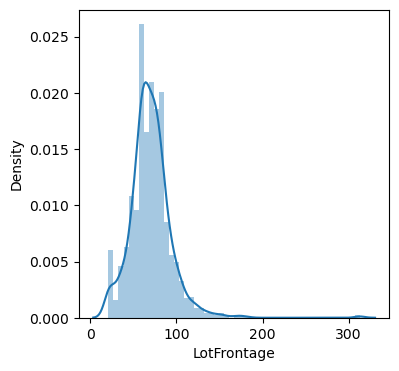

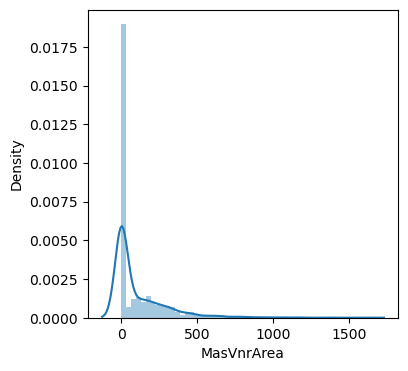

In [213]:
#Check for missing values
na_df = df.isna().sum()
for i in range(0, len(na_df)):
    if(na_df[i]>0):
        print(na_df.index[i], na_df[i])
        plt.figure(figsize=[4,4])
        sb.distplot(df[na_df.index[i]])

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Since, these two features are numeric & has normal distribution let's fill the missing values with medians</p>
</div>

In [214]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

In [215]:
df.isna().sum().sum()

0

[Back To Top🔝](#content0)
## 4. Derived Metrics<a name="content4"/>

#### Creating a new feature 'Age' from 'YrSold' & 'YearBuilt' 

In [216]:
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']

In [217]:
## Drop the two columns from which we created new one
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

### Outlier checking on numeric data

In [218]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age
count,"1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000"
mean,69.864,"10,516.828","1,984.866",103.117,443.640,46.549,567.240,"1,057.429","1,162.627",346.992,5.845,"1,515.464",0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,"180,921.196",36.548
std,22.028,"9,981.265",20.645,180.731,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,"79,442.503",30.250
min,21.000,"1,300.000","1,950.000",0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,"34,900.000",0.000
25%,60.000,"7,553.500","1,967.000",0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,"1,129.500",0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,"129,975.000",8.000
50%,69.000,"9,478.500","1,994.000",0.000,383.500,0.000,477.500,991.500,"1,087.000",0.000,0.000,"1,464.000",0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,"163,000.000",35.000
75%,79.000,"11,601.500","2,004.000",164.250,712.250,0.000,808.000,"1,298.250","1,391.250",728.000,0.000,"1,776.750",1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,"214,000.000",54.000
90%,92.000,"14,381.700","2,006.000",335.000,"1,065.500",117.200,"1,232.000","1,602.200","1,680.000",954.200,0.000,"2,158.300",1.000,0.000,2.000,1.000,4.000,1.000,9.000,1.000,3.000,757.100,262.000,130.000,112.000,0.000,0.000,0.000,0.000,10.000,"278,000.000",84.000
95%,104.000,"17,401.150","2,007.000",456.000,"1,274.000",396.200,"1,468.000","1,753.000","1,831.250","1,141.050",0.000,"2,466.100",1.000,1.000,2.000,1.000,4.000,1.000,10.000,2.000,3.000,850.100,335.000,175.050,180.150,0.000,160.000,0.000,0.000,11.000,"326,100.000",91.000
99%,137.410,"37,567.640","2,009.000",791.280,"1,572.410",830.380,"1,797.050","2,155.050","2,219.460","1,418.920",360.000,"3,123.480",2.000,1.000,3.000,1.000,5.000,2.000,11.000,2.000,3.000,"1,002.790",505.460,285.820,261.050,168.000,268.050,0.000,700.000,12.000,"442,567.010",110.410


<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Here we can see that the max value is more than 100 times the mean for 'LotArea'. It implies there are outliers in the data. So let's check if it is the same case for other features and remove outliers for the required features</p>
</div>

In [219]:
def remove_outliers(x, col):
    higher_val = x[col].quantile(0.99)
    out = x[(x[col]<higher_val)]
    return out

In [220]:
# considering features which has outliers & removing without effecting the overall data
outlier_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
               '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
for col in outlier_cols:
    df = remove_outliers(df, col)

In [221]:
df.shape

(1221, 79)

In [222]:
## Extract numerical columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.head(5)

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age
0,65.000,8450,2003,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,5
1,80.000,9600,1976,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500,31
2,68.000,11250,2002,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500,7
4,84.000,14260,2000,350.000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000,8
6,75.000,10084,2005,186.000,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,307000,3


In [223]:
## Extract categorical columns
df_categorical = df.select_dtypes(include='category')
df_categorical.head()

,MSSubClass,OverallQual,OverallCond
0,60,7,5
1,20,6,8
2,60,7,5
4,60,8,5
6,20,8,5


[Back To Top🔝](#content0)
## 5. Univariate Analysis<a name="content5"/>

### 5.1 Univariate Analysis on target feature<a name="content5_1"/>

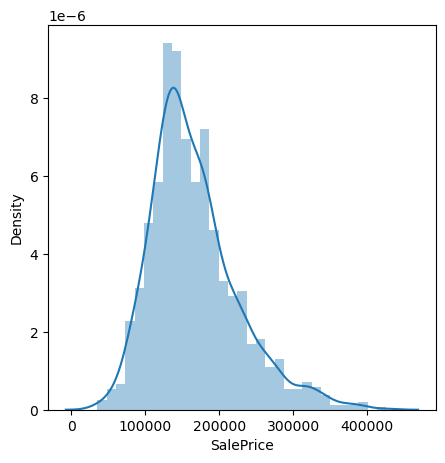

In [224]:
#Univariate Analysis on the target variable - SalePrice (Sales Price)
plt.figure(figsize=[5,5])
sb.distplot(df['SalePrice']);

In [225]:
print("Skweness of target var ",df['SalePrice'].skew())
print("Kurtosis of target var ",df['SalePrice'].kurt())

Skweness of target var  0.9945132482022968
Kurtosis of target var  1.3225322008675886


<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>We can see that the target var is right skewed and the values of skewness & kurtosis >1.
        <br/>It implies that it is <b>highly skewed<b/> and lets apply log on target feature</p>
</div>

Skweness of target var  -0.19479555180106867
Kurtosis of target var  0.6827139233857711


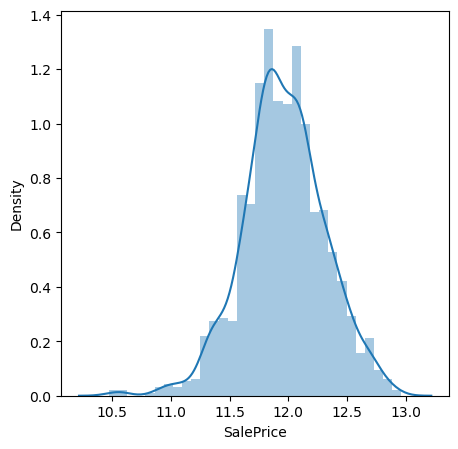

In [226]:
## Apply log on the target var
df['SalePrice'] = np.log(df['SalePrice'])
plt.figure(figsize=[5,5])
sb.distplot(df['SalePrice']);
print("Skweness of target var ",df['SalePrice'].skew())
print("Kurtosis of target var ",df['SalePrice'].kurt())

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Now we can see that both skewness & kurtosis are <1 & It is normally distributed </p>
</div>

[Back To Top🔝](#content0)
### 5.2 Univariate Analysis on numeric<a name="content5_2"/>

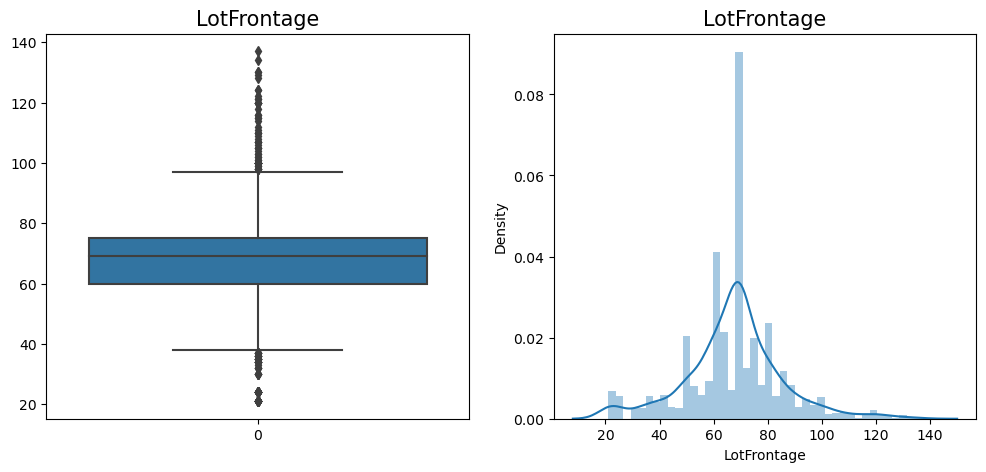

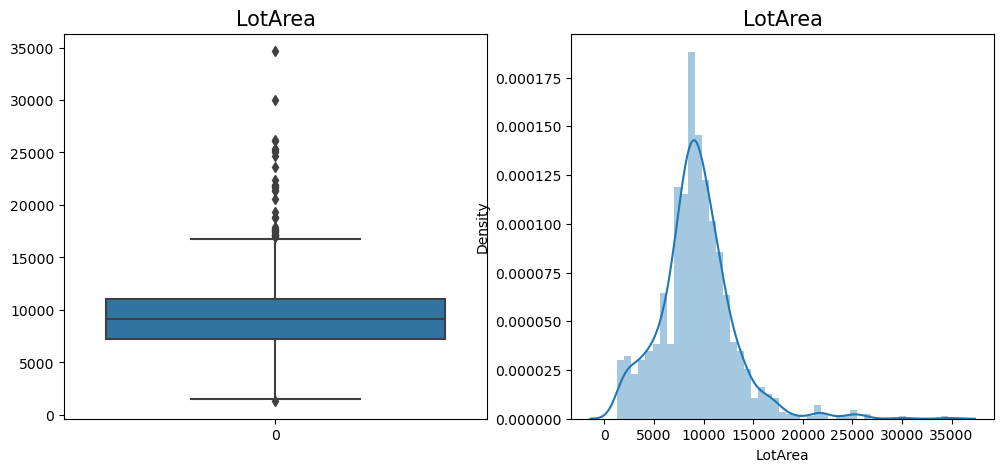

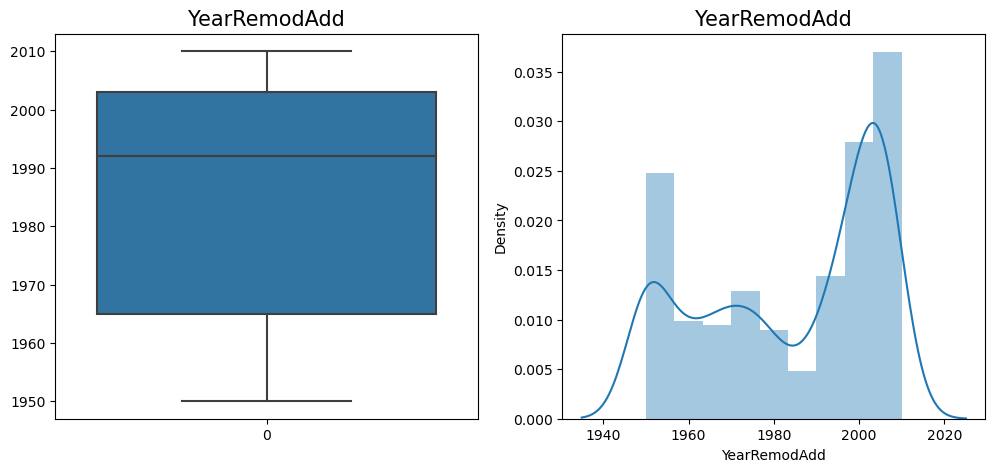

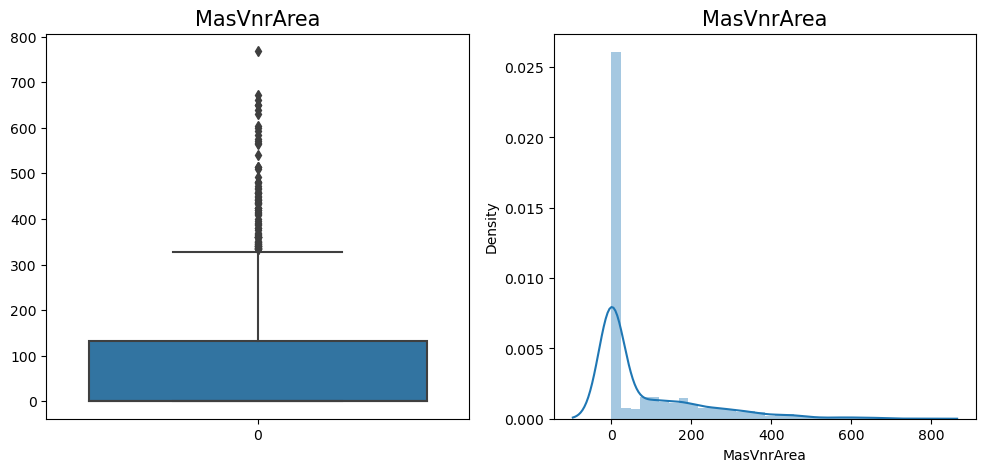

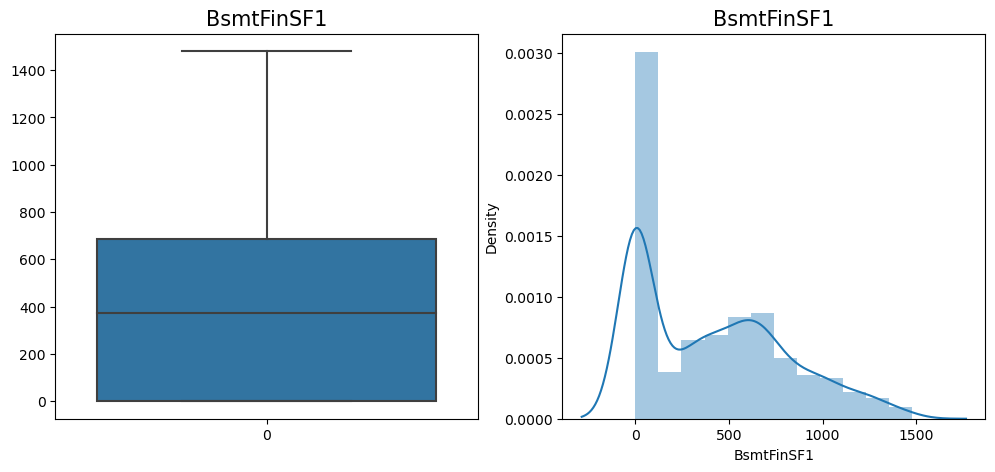

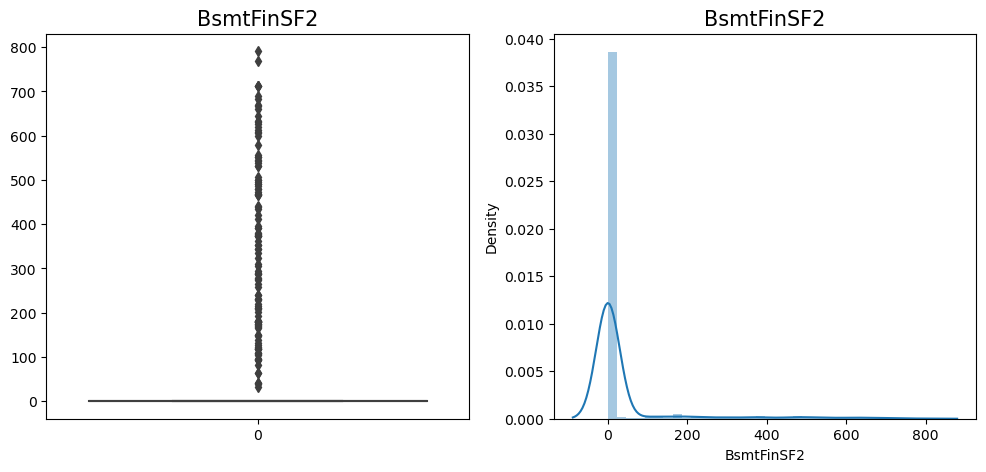

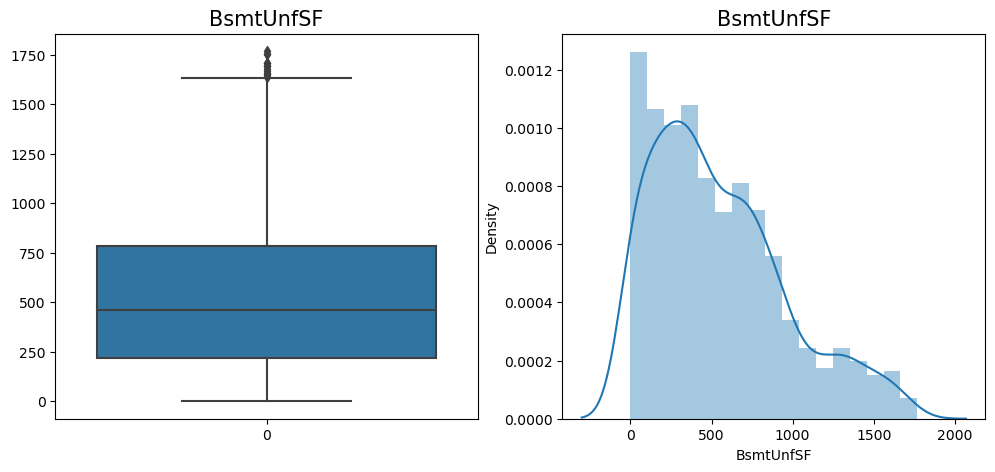

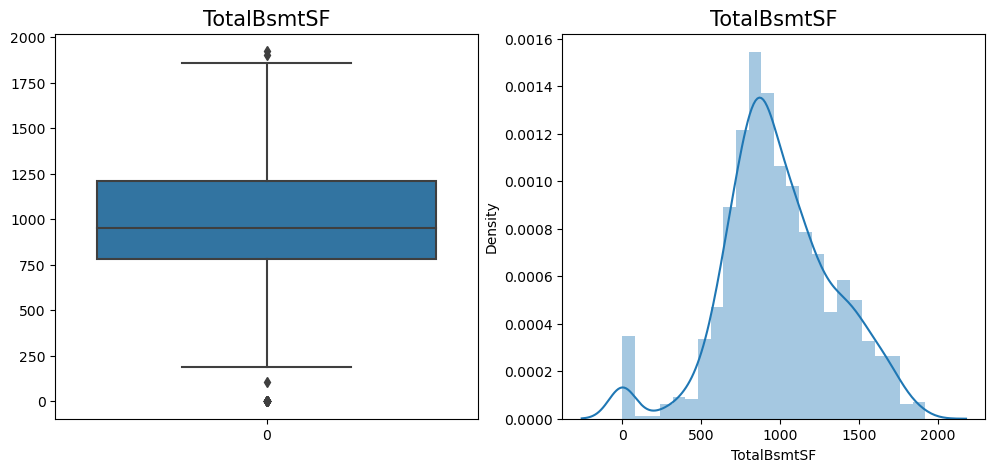

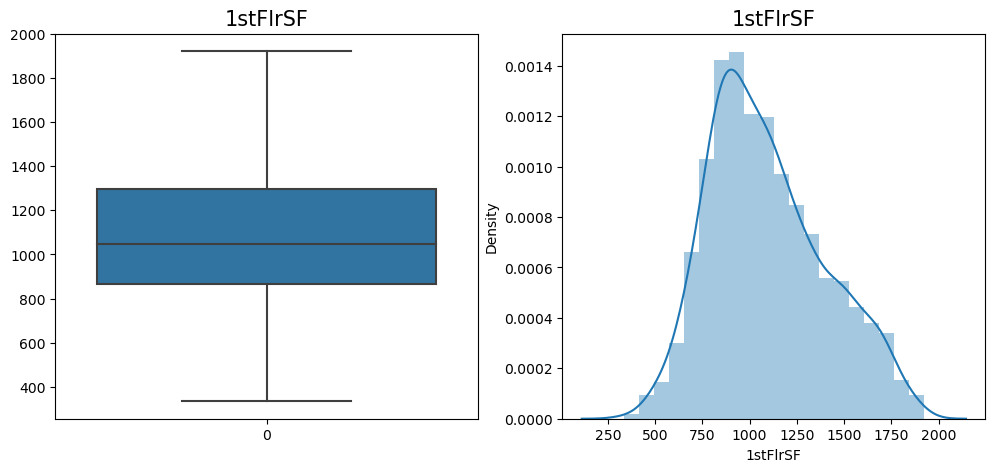

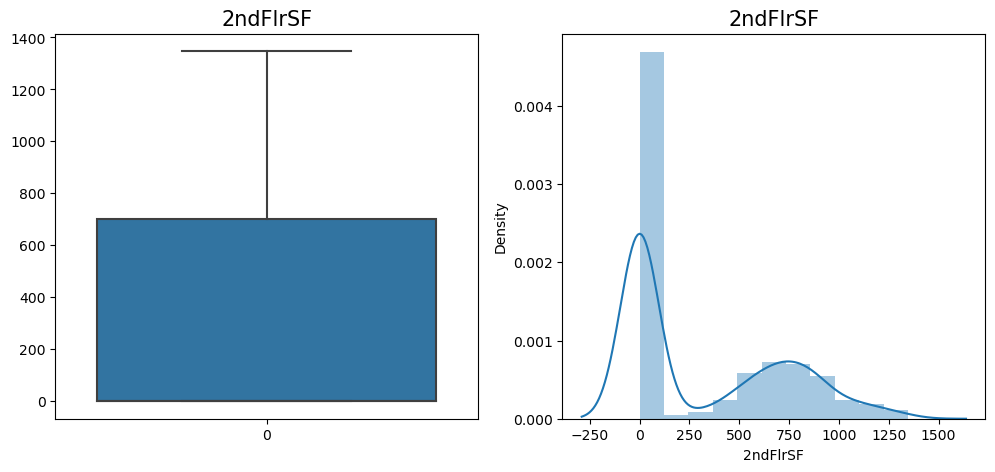

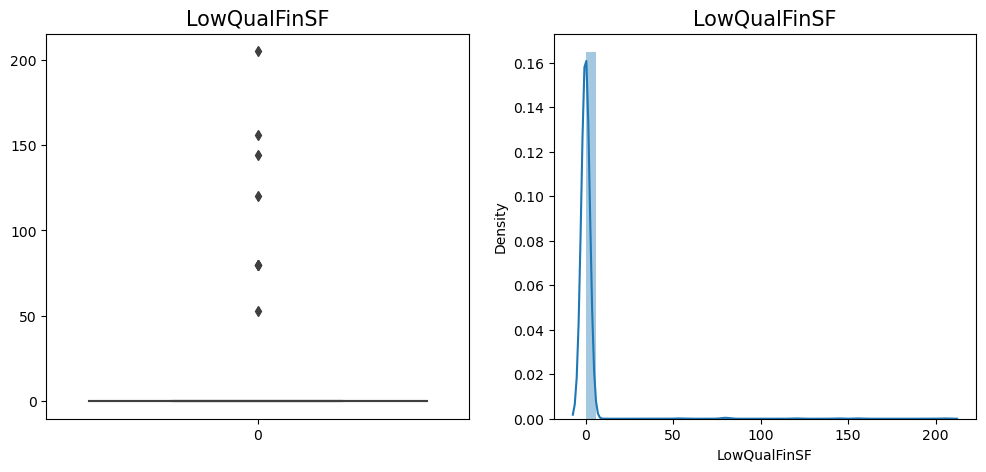

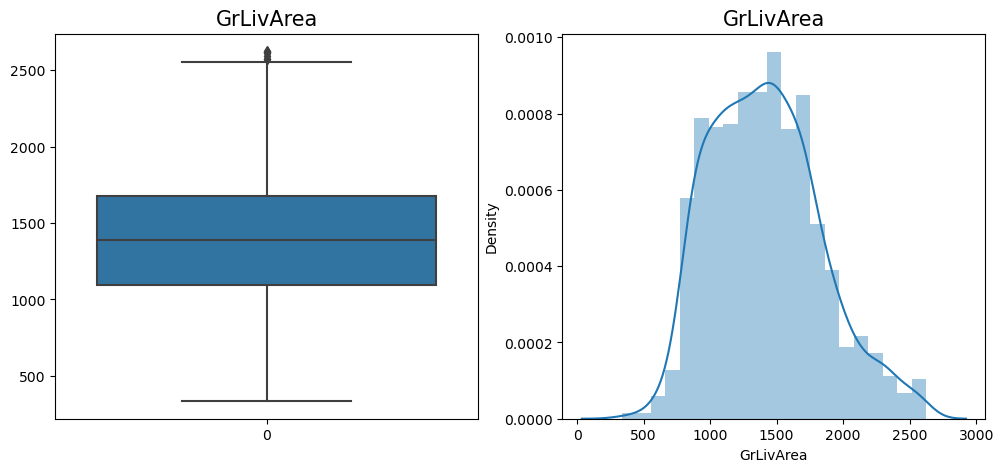

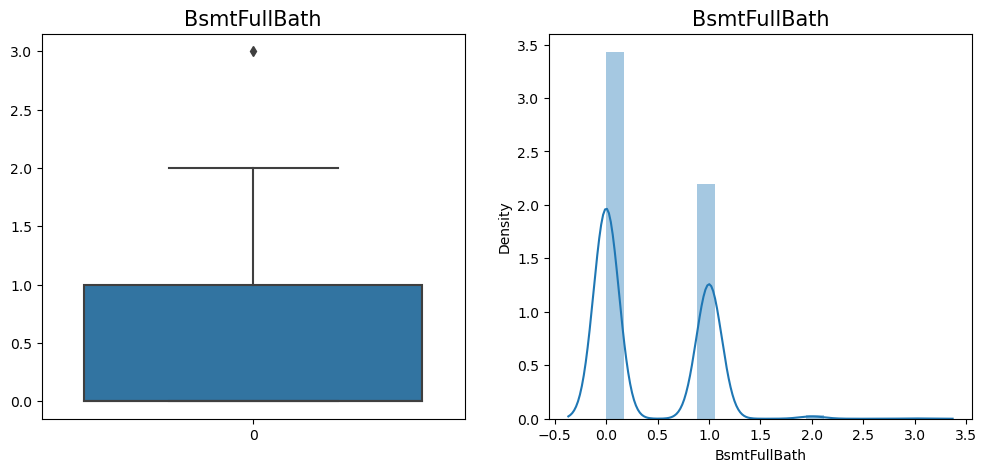

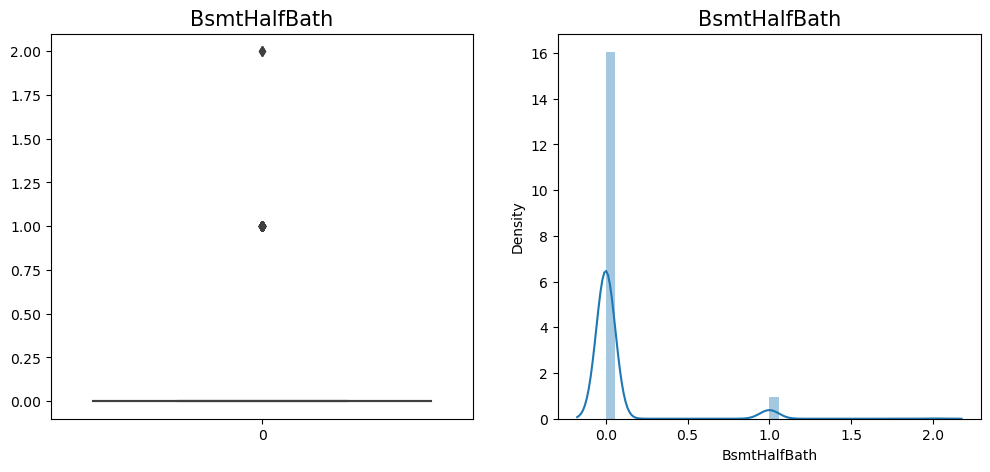

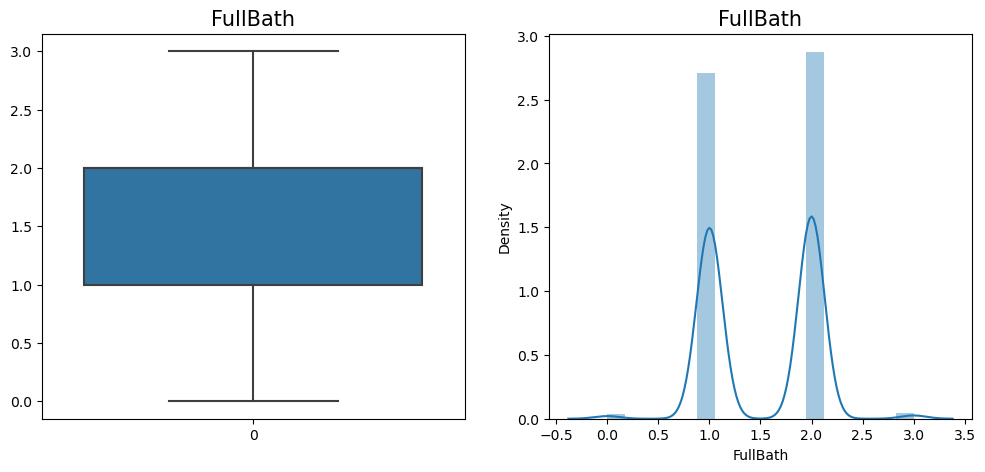

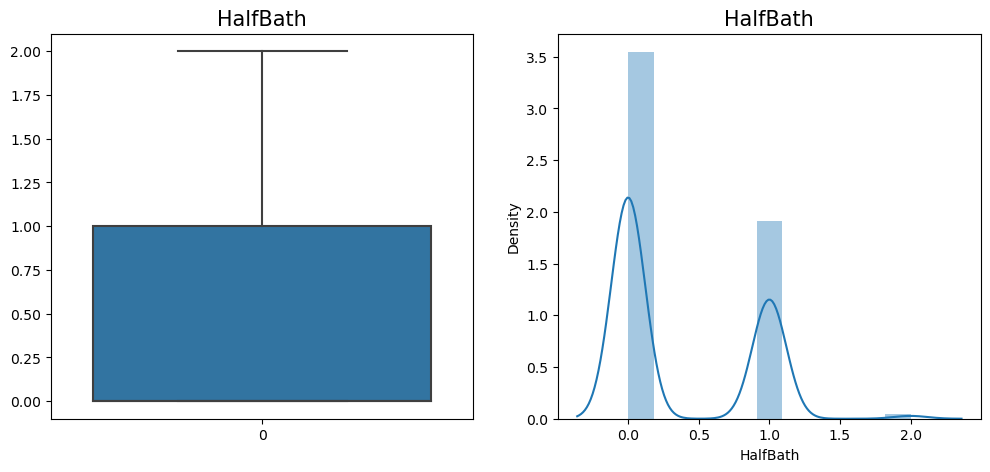

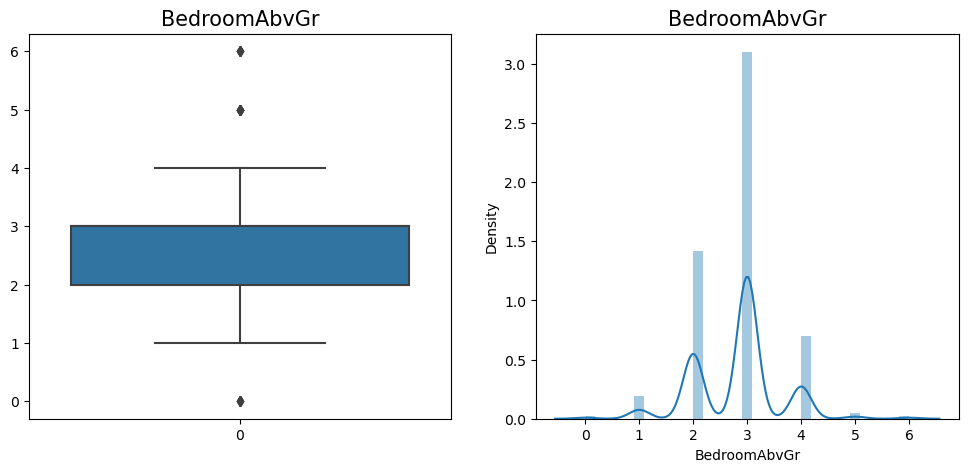

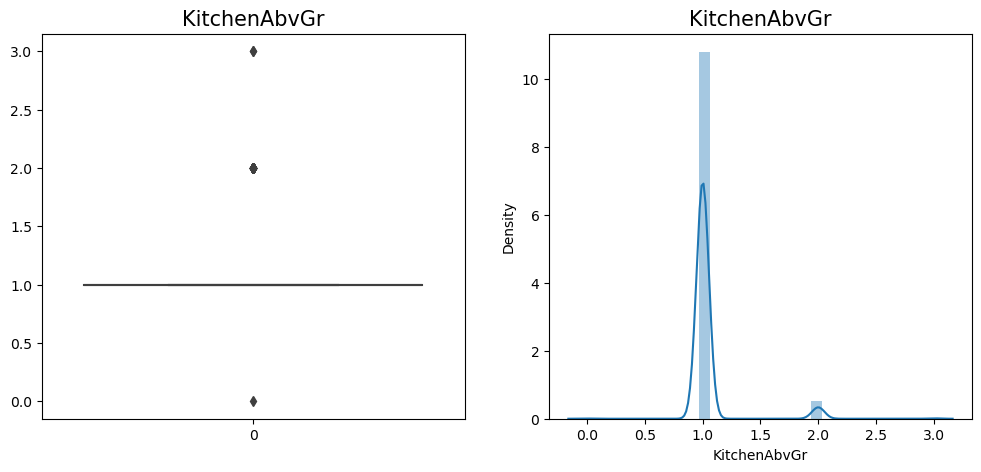

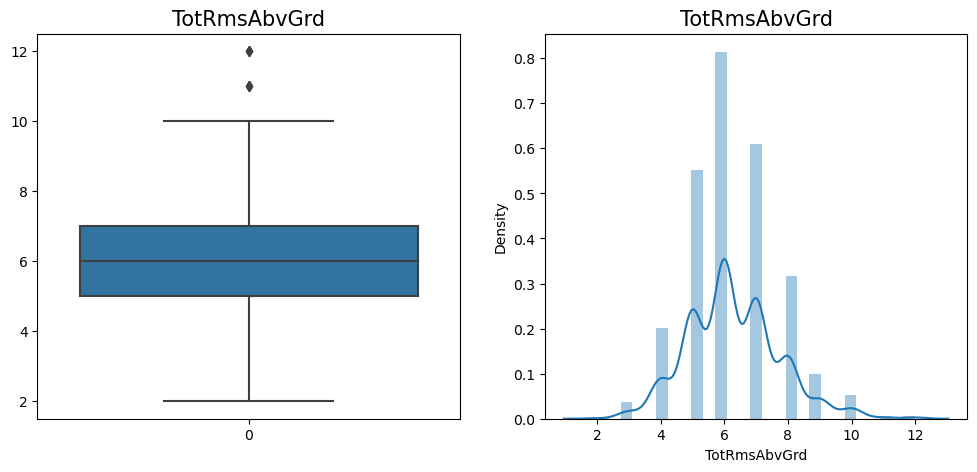

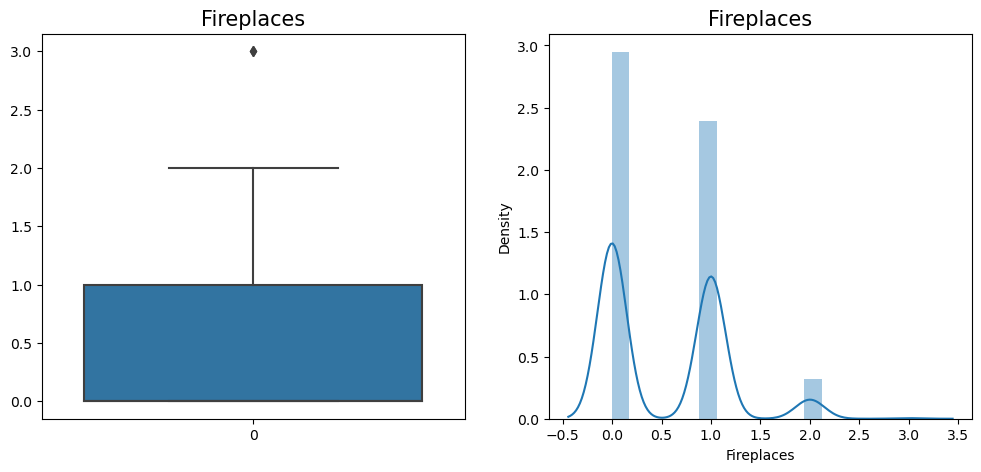

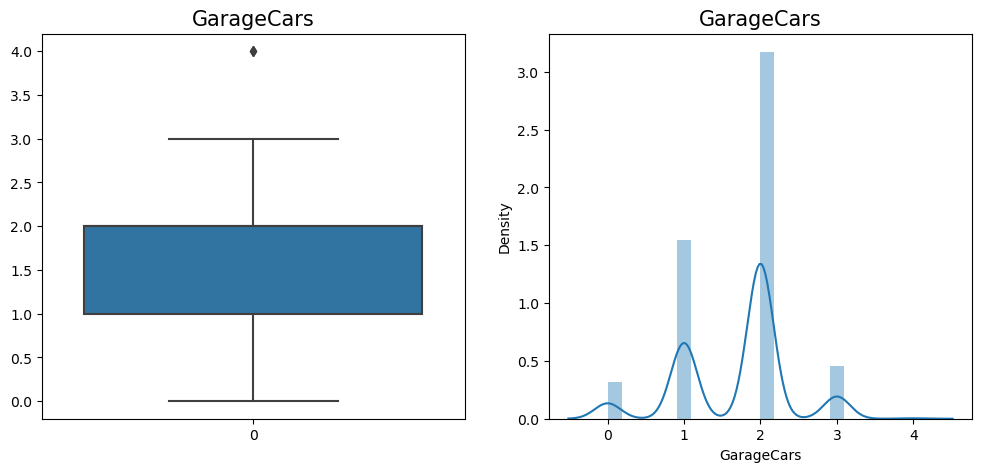

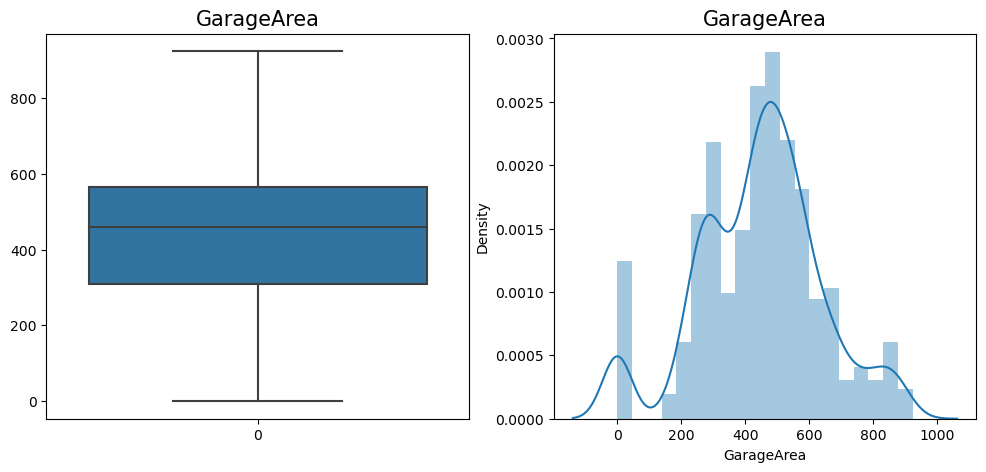

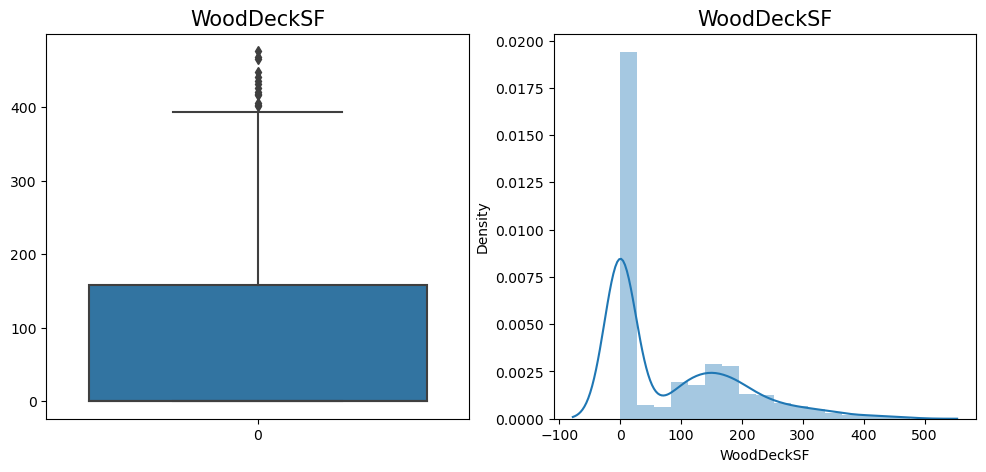

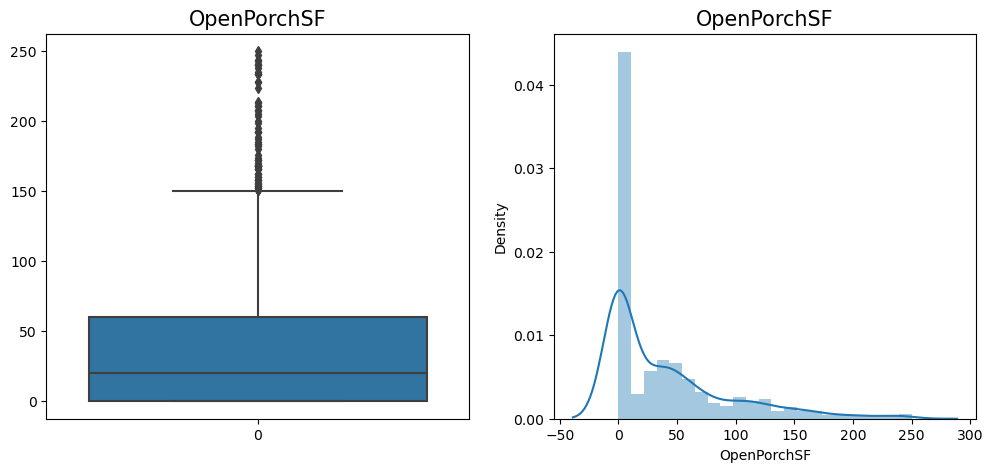

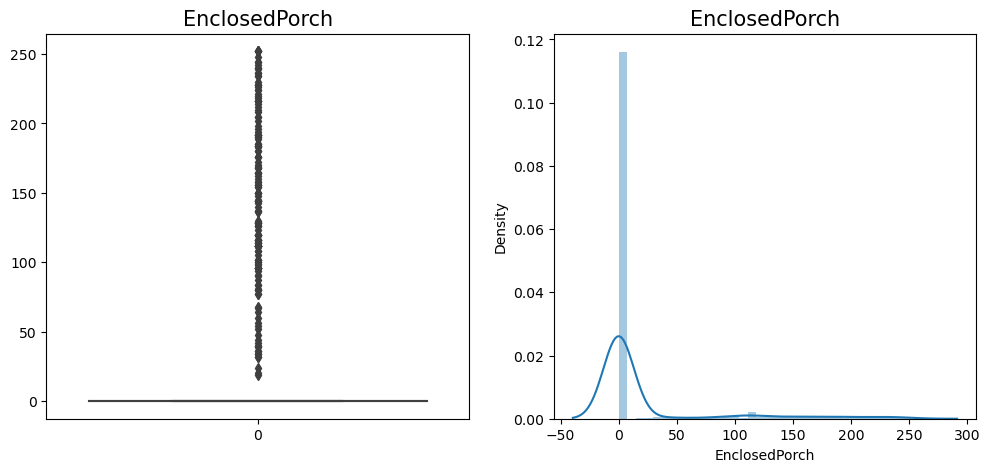

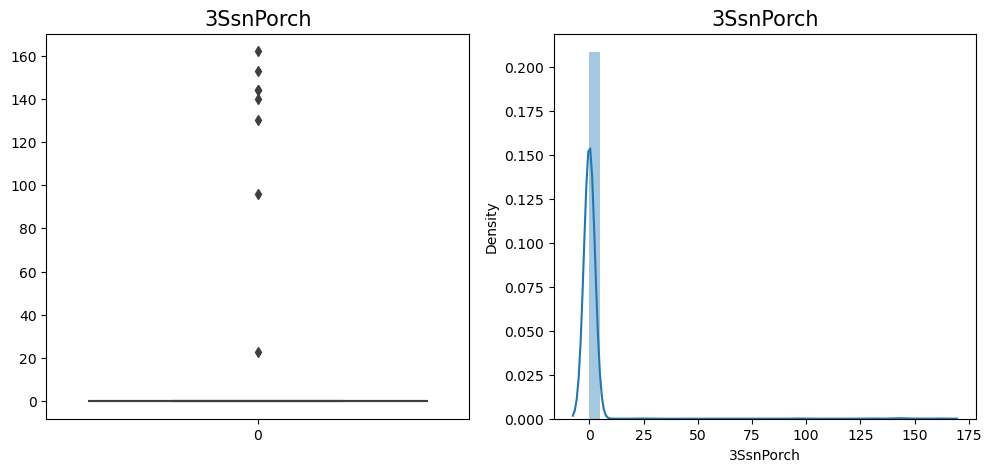

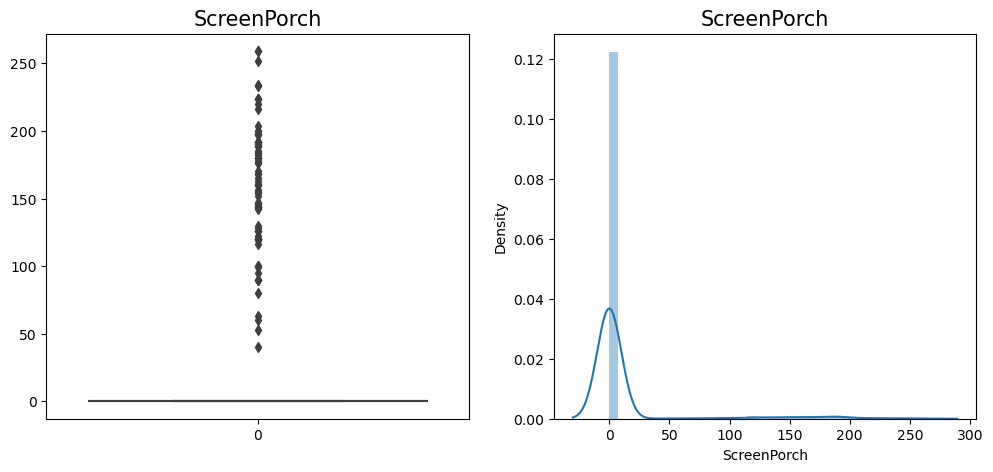

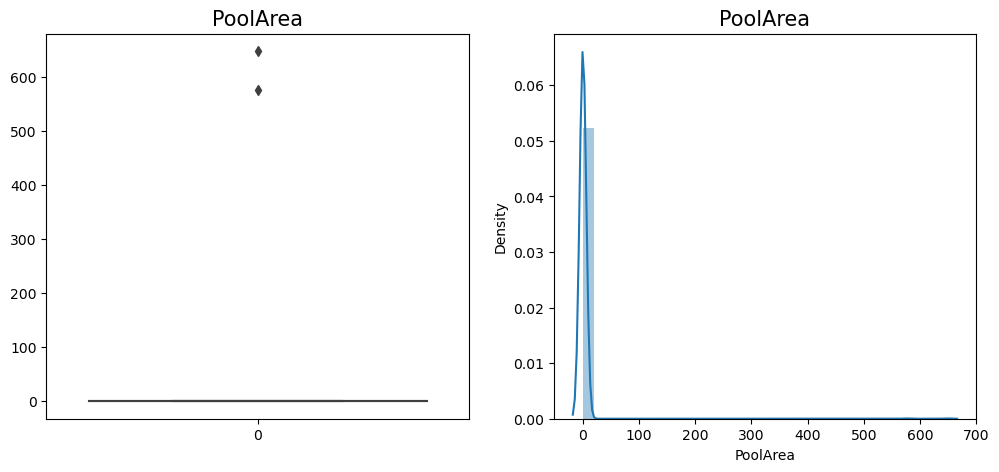

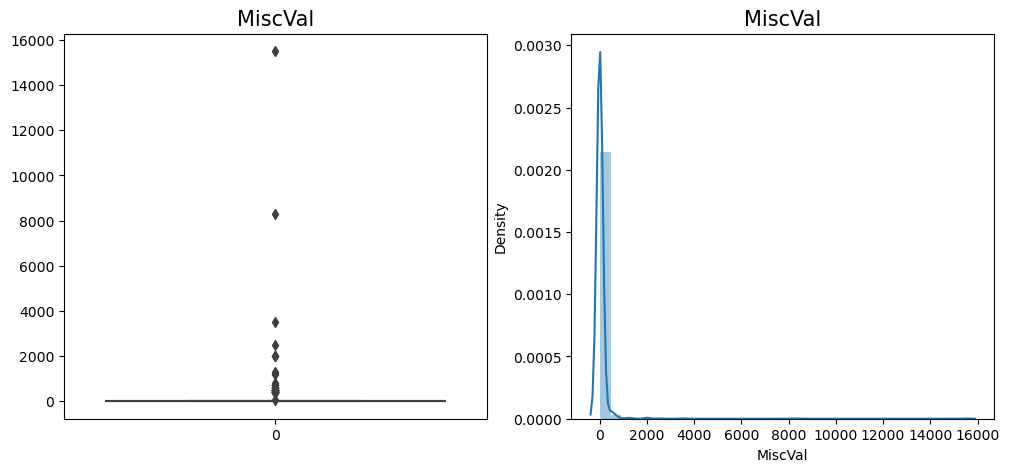

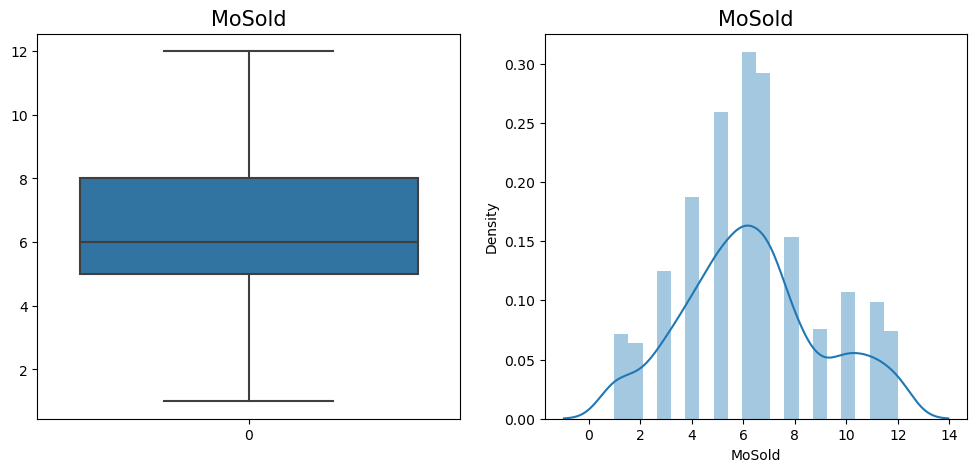

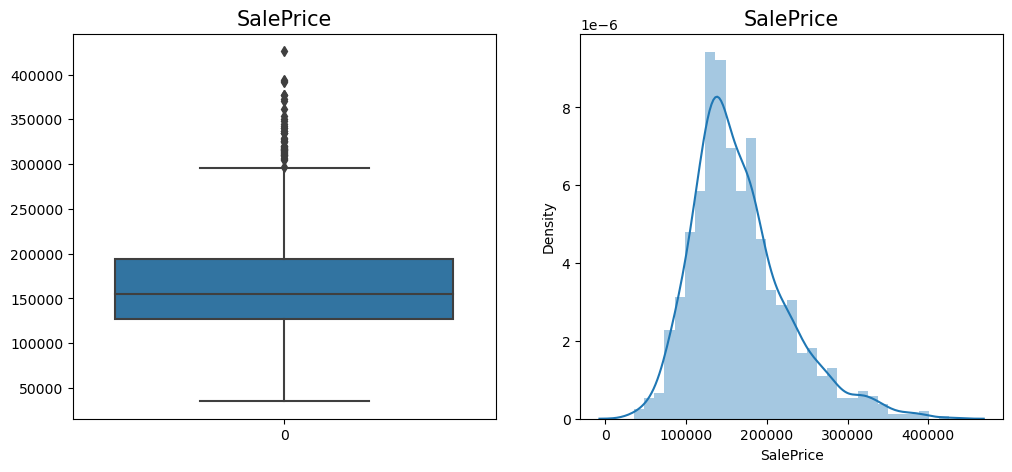

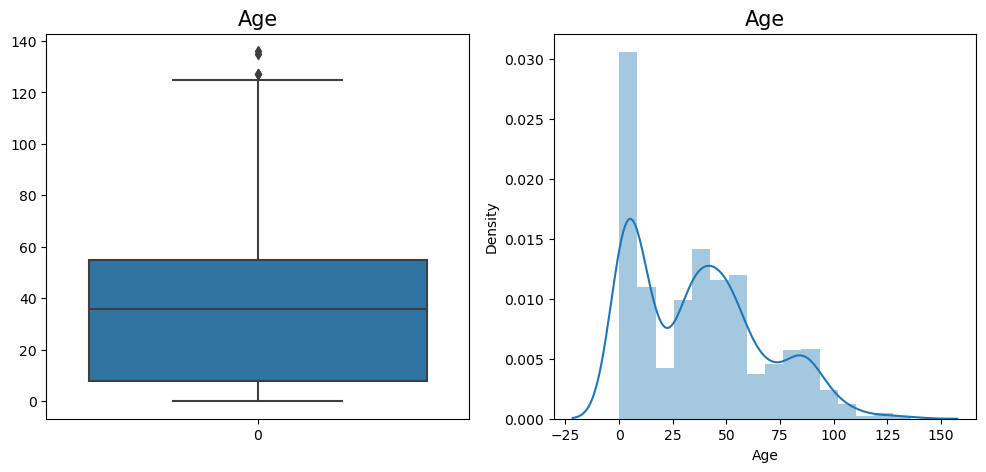

In [227]:
## Univariate Analysis on all continuos features using  boxplots & histograms

for col in df_numeric.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 15})
    sb.boxplot(df_numeric[col])
    
    plt.subplot(1,2,2)
    plt.title(col, fontdict={'fontsize': 15})
    sb.distplot(df_numeric[col])
    
    plt.show()  

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/> 1. Here We can clearly observe that many of the numerical features are having non normal distribution.
        <br/>2. We can also see that outliers has been handled for numerical features
</div>

[Back To Top🔝](#content0)
### 5.3 Univariate Analysis on categorical<a name="content5_3"/>

In [228]:
## View the unique values of all Categorical columns
for col in df_categorical.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[60, 20, 50, 190, 45, ..., 80, 160, 75, 180, 40]
Length: 15
Categories (15, int64): [20, 30, 40, 45, ..., 120, 160, 180, 190] 

OverallQual
[7, 6, 8, 5, 9, 4, 3, 1, 10, 2]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10] 

OverallCond
[5, 8, 6, 7, 4, 3, 9, 2, 1]
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 9] 



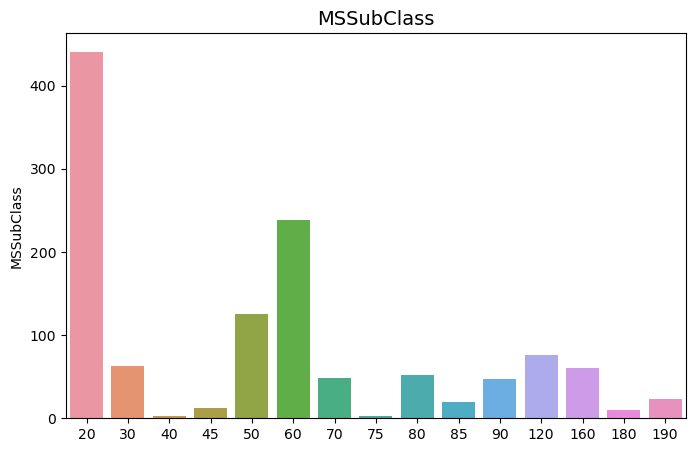

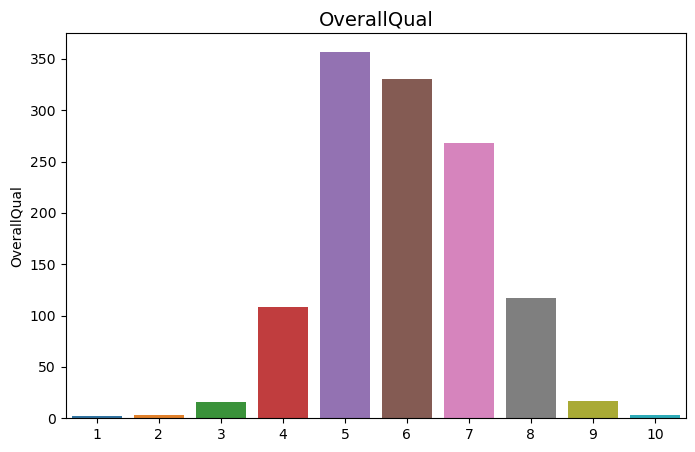

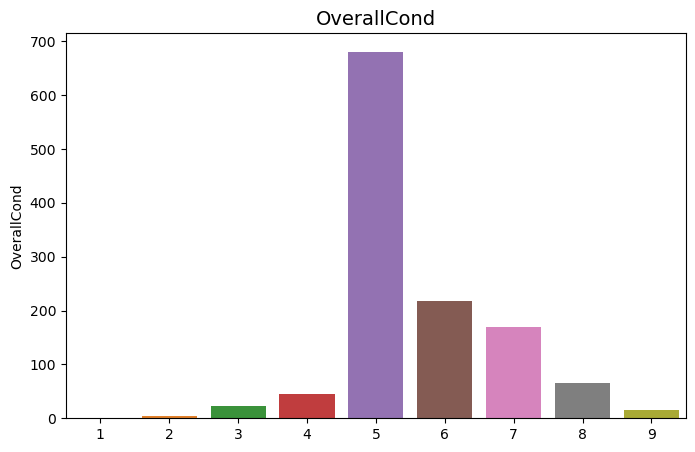

In [229]:
## Visualisation of categorical columns using bar plots
for col in df_categorical.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 14})
    sb.barplot(x=df_categorical[col].value_counts().index, y=df_categorical[col].value_counts())
    plt.show()

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/> Here We can clearly observe from above value counts and bar plots that there is no column with single unique value that we could remove
</div>

[Back To Top🔝](#content0)
## 6. Bivariate Analysis<a name="content6"/>

<Axes: >

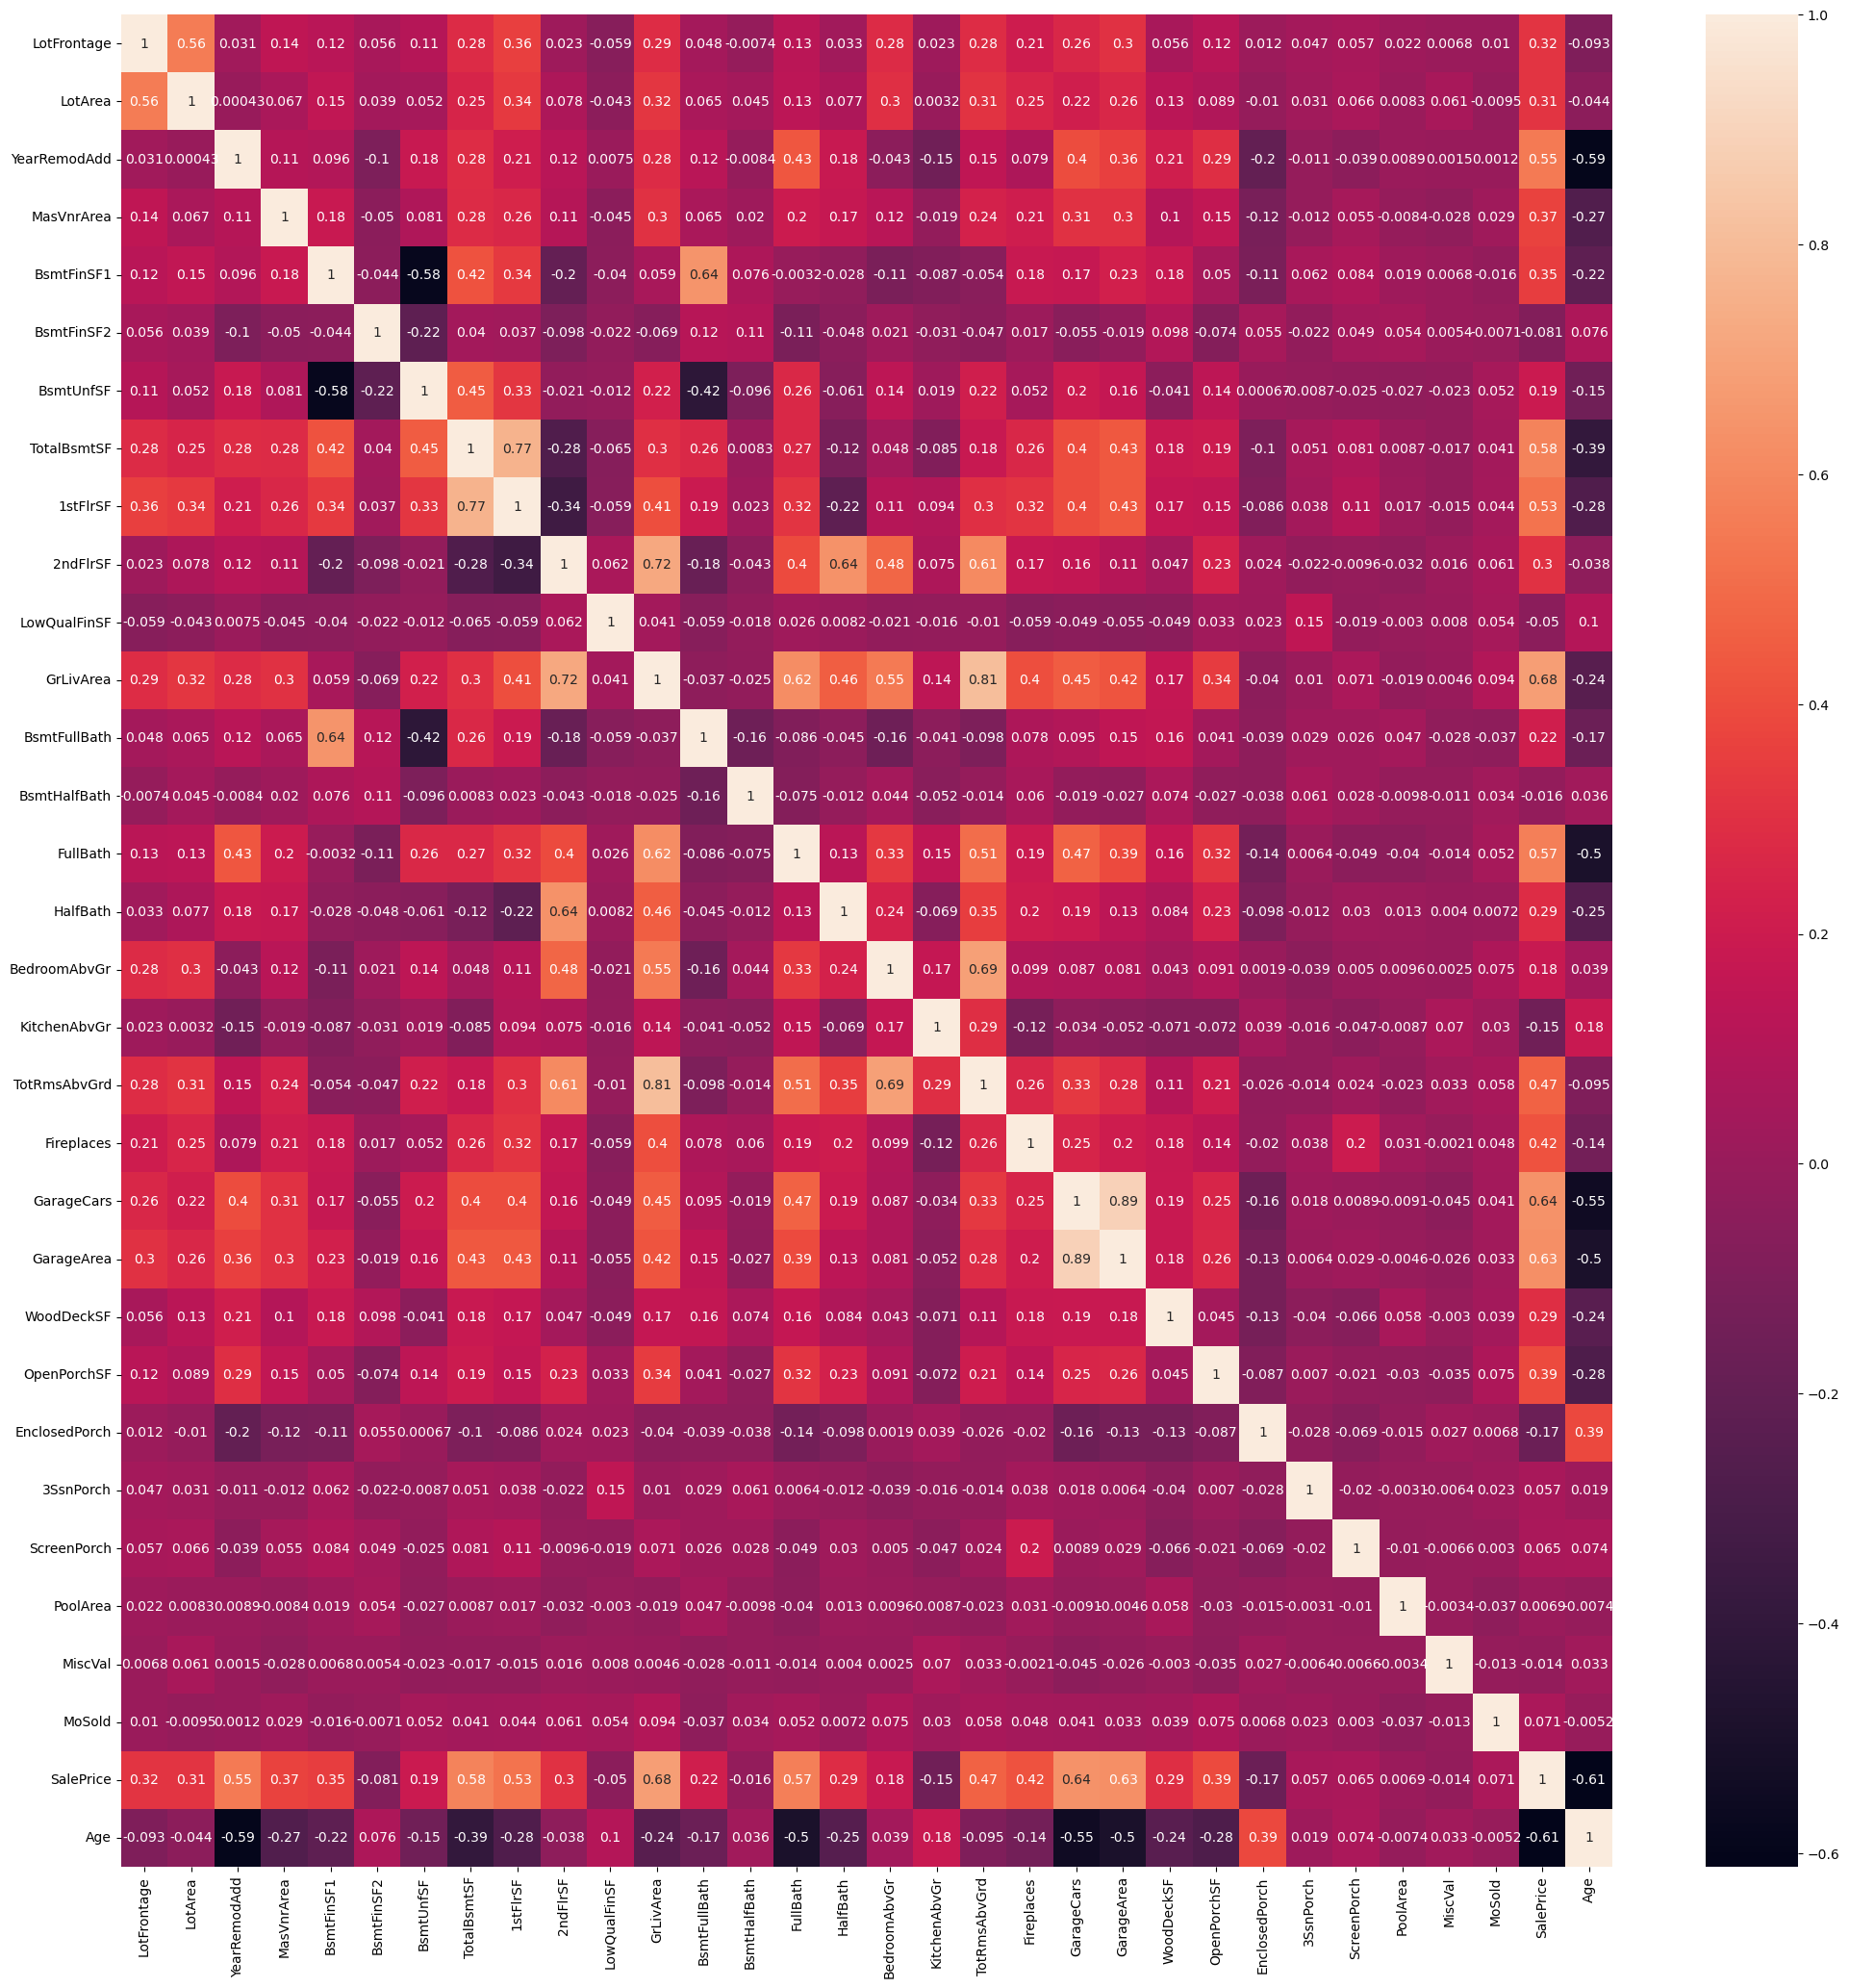

In [230]:
plt.figure(figsize=(25,25))
sb.heatmap(df_numeric.corr(), annot=True)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/> Here We can clearly observe that multi-collinearity exists in the data like for 'TotalBsmtSF', '1stFlrSF' & 'GarageCars', 'GarageArea'
</div>

[Back To Top🔝](#content0)
## 7. Data Preperation<a name="content7"/>

### 7.1 Dummy Variables <a name="content7_1"/>

In [231]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_catogerical = df.select_dtypes(include='category')

In [232]:
#Creating the dummy variables for categorical
df_dummy = pd.get_dummies(df_catogerical, drop_first=True)
df_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [233]:
df = pd.concat([df_numeric, df_dummy], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1457
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotFrontage     1221 non-null   float64
 1   LotArea         1221 non-null   int64  
 2   YearRemodAdd    1221 non-null   int64  
 3   MasVnrArea      1221 non-null   float64
 4   BsmtFinSF1      1221 non-null   int64  
 5   BsmtFinSF2      1221 non-null   int64  
 6   BsmtUnfSF       1221 non-null   int64  
 7   TotalBsmtSF     1221 non-null   int64  
 8   1stFlrSF        1221 non-null   int64  
 9   2ndFlrSF        1221 non-null   int64  
 10  LowQualFinSF    1221 non-null   int64  
 11  GrLivArea       1221 non-null   int64  
 12  BsmtFullBath    1221 non-null   int64  
 13  BsmtHalfBath    1221 non-null   int64  
 14  FullBath        1221 non-null   int64  
 15  HalfBath        1221 non-null   int64  
 16  BedroomAbvGr    1221 non-null   int64  
 17  KitchenAbvGr    1221 non-null   i

[Back To Top🔝](#content0)
### 7.2 Separate independent and dependent variables <a name="content7_2"/>

In [234]:
X = df.drop(["SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
0,65.000,8450,2003,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,80.000,9600,1976,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,68.000,11250,2002,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,84.000,14260,2000,350.000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
6,75.000,10084,2005,186.000,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [235]:
y = df["SalePrice"]
y.head()

0   12.248
1   12.109
2   12.317
4   12.429
6   12.635
Name: SalePrice, dtype: float64

[Back To Top🔝](#content0)
### 7.3 Splitting the Data into Train and Test Sets  <a name="content7_3"/>

In [236]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [237]:
print("X train",X_train.shape)
print("y train",y_train.shape)
print("X test",X_test.shape)
print("y test",y_test.shape)

X train (976, 62)
y train (976,)
X test (245, 62)
y test (245,)


[Back To Top🔝](#content0)
### 7.4 Feature Scaling <a name="content7_4"/>

In [238]:
## list of numerical columns for standardize scaling
numeric_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
numeric_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [239]:
#Creating instance for StandardScaler
scaler = StandardScaler()

## Scale the numerical columns 
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [240]:
## Define a function for checking metrics below metrics
#     1. R-Squared (Train)
#     2. R-Squared (Test)
#     3. RSS (Train)
#     4. RSS (Test)
#     5. MSE (Train)
#     6. MSE (Test)
#     7. RMSE (Train)
#     8. RMSE (Test)
def calc_metrics(y_train, y_train_pred, y_test, y_pred):
    
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) = ", '%.3f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) = ", '%.3f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) = ", '%.3f' % rss_train)
    print("RSS (Test) = ", '%.3f' % rss_test)
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) = ", '%.3f' % mse_train)
    print("MSE (Test) = ", '%.3f' % mse_test)

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.3f' % rmse_train) 
    print("RMSE (Test) =", '%.3f' % rmse_test) 
    
    return metric

## Define a function for plotting R2 score vs alpha values
def plot_r2_alpha(data):
    plt.plot(data['param_alpha'], data['mean_train_score'], label='Train')
    plt.plot(data['param_alpha'], data['mean_test_score'], label='Test')
    plt.xlabel('alpha')
    plt.ylabel('R2_score')
    plt.xscale('log')
    plt.legend()
    plt.show()

[Back To Top🔝](#content0)
## 8. Ridge Regression (Regularisation)<a name="content8"/>

In [241]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [242]:
# Printing the best hyperparameter alpha
print(ridge_cv.best_params_)

{'alpha': 1.0}


In [243]:
## View the results of cross validation search
ridge_cv.cv_results_

{'mean_fit_time': array([0.00535612, 0.00695028, 0.00273843, 0.00229802, 0.00143747,
        0.00168252, 0.00104427, 0.00103312, 0.00159245, 0.00111222,
        0.00114021, 0.00165606, 0.00107822, 0.00118752, 0.0016314 ,
        0.00105419, 0.00104976, 0.00106544, 0.00193233, 0.0010438 ,
        0.00103521, 0.00158024, 0.00106502, 0.00110316, 0.00190954,
        0.00104098, 0.00221901, 0.00104351]),
 'std_fit_time': array([2.88816170e-03, 3.66449625e-03, 2.86958423e-03, 2.35134873e-03,
        2.87778490e-04, 8.68837984e-04, 6.85220140e-06, 1.84308511e-06,
        8.30068634e-04, 1.49993901e-04, 2.14933078e-04, 8.28605255e-04,
        4.22909131e-06, 2.31414600e-04, 9.44257818e-04, 1.46052349e-05,
        8.28517427e-06, 4.42789968e-05, 1.05120588e-03, 4.04328669e-06,
        2.06751665e-06, 8.06520557e-04, 5.40843495e-05, 1.39849762e-04,
        1.70870964e-03, 6.74754065e-06, 2.35651936e-03, 1.33262123e-05]),
 'mean_score_time': array([0.00344257, 0.00504017, 0.00142298, 0.00111756, 

[Back To Top🔝](#content0)
### 8.1 Building Model for Ridge Regression<a name="content8_1"/>

In [244]:
#Fitting Ridge model for alpha = 1 on train data and printing coefficients which have been penalised
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.00852435  0.01702203  0.01519102  0.0034578   0.03141389  0.0042981
  0.00086855  0.03809017  0.02841308  0.05002517 -0.00857     0.06967358
  0.01337402  0.0014858   0.0311728   0.01115526 -0.00900968 -0.03042729
  0.00479624  0.01666027  0.02485637  0.00938169  0.00820812  0.00835256
  0.0088553   0.01442152  0.01344524  0.00485465 -0.00087884  0.00107963
 -0.11517987  0.00378023 -0.00096624  0.06663353  0.01938784 -0.05817373
  0.06863306  0.01417897  0.0025106   0.00484768 -0.01690471 -0.00484575
 -0.11085983 -0.09289514  0.03435253 -0.26767161 -0.12025306 -0.00606453
  0.04087711  0.05861564  0.12663825  0.22092173  0.31819707  0.26439462
 -0.04766076 -0.17649895 -0.06050785  0.02077795  0.07085458  0.12362295
  0.13555804  0.21081328]


[Back To Top🔝](#content0)
### 8.2 Model Evaluation for Ridge Regression<a name="content8_2"/>

In [245]:
#Make predictions & print the evaluation metrics score
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
ridge_metrics = calc_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) =  0.903
R-Squared (Test) =  0.850
RSS (Train) =  11.889
RSS (Test) =  4.126
MSE (Train) =  0.012
MSE (Test) =  0.017
RMSE (Train) = 0.110
RMSE (Test) = 0.130


[Back To Top🔝](#content0)
### 8.3 R2_score vs alpha plot for Ridge<a name="content8_3"/>
Let's plot r2_score against differemt alpha values & check the result

In [246]:
df_ridge = pd.DataFrame(ridge_cv.cv_results_)
df_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005,0.003,0.003,0.001,0.000,{'alpha': 0.0001},-0.081,-0.085,-0.083,-0.080,-0.087,-0.083,0.002,17,-0.075,-0.075,-0.075,-0.076,-0.073,-0.075,0.001
1,0.007,0.004,0.005,0.003,0.001,{'alpha': 0.001},-0.081,-0.085,-0.083,-0.080,-0.087,-0.083,0.002,16,-0.075,-0.075,-0.075,-0.076,-0.073,-0.075,0.001
2,0.003,0.003,0.001,0.001,0.010,{'alpha': 0.01},-0.081,-0.085,-0.083,-0.080,-0.086,-0.083,0.002,15,-0.075,-0.075,-0.075,-0.076,-0.073,-0.075,0.001
3,0.002,0.002,0.001,0.001,0.050,{'alpha': 0.05},-0.081,-0.085,-0.083,-0.080,-0.086,-0.083,0.003,13,-0.075,-0.075,-0.075,-0.076,-0.074,-0.075,0.001
4,0.001,0.000,0.001,0.001,0.100,{'alpha': 0.1},-0.081,-0.085,-0.082,-0.080,-0.086,-0.083,0.003,12,-0.075,-0.075,-0.075,-0.077,-0.074,-0.075,0.001


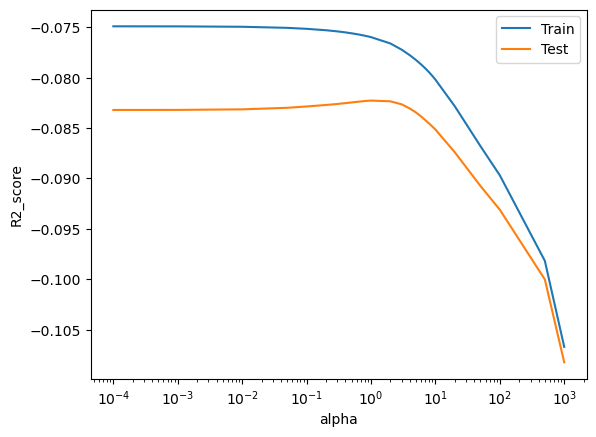

In [247]:
plot_r2_alpha(df_ridge)

As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.

From graph also, it is apparent that the optimal value of alpha is 1.

[Back To Top🔝](#content0)
## 9. Lasso Regression (Regularisation)<a name="content9"/>

In [248]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [249]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.0001}


In [250]:
## View the results of cross validation search
lasso_cv.cv_results_

{'mean_fit_time': array([0.05607209, 0.00814052, 0.00214014, 0.00180554, 0.00211029,
        0.00122123, 0.00101619, 0.00175261, 0.00100651, 0.00099316,
        0.00173407, 0.00109076, 0.0010138 , 0.00147171, 0.00102773,
        0.00101643, 0.00150323, 0.00098805, 0.00102   , 0.00204906,
        0.00099134, 0.00099077, 0.0009872 , 0.00098672, 0.00174904,
        0.00106506, 0.00100904, 0.00175605]),
 'std_fit_time': array([4.47940973e-03, 5.26487919e-04, 3.97030138e-04, 9.31813502e-05,
        9.75758431e-04, 9.90052664e-05, 4.31372943e-06, 9.15581942e-04,
        1.09803081e-05, 3.05919932e-06, 9.15956973e-04, 1.93741936e-04,
        3.88270787e-05, 9.13042598e-04, 2.34328473e-05, 2.97173242e-06,
        9.56912504e-04, 3.59182159e-06, 5.49932803e-05, 1.37534544e-03,
        2.44538906e-06, 6.45159089e-06, 5.61089646e-06, 1.73636832e-06,
        8.97102426e-04, 1.02989585e-04, 2.11320112e-06, 9.61885101e-04]),
 'mean_score_time': array([0.00153942, 0.0005404 , 0.00095005, 0.00081801, 

[Back To Top🔝](#content0)
### 9.1 Building Model for Lasso<a name="content9_1"/>

In [251]:
#Fitting lasso model for alpha = 0.0001 on train data and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
print(lasso.coef_)

[ 0.00801091  0.01782361  0.01359407  0.00266581  0.02998974  0.00392242
 -0.          0.03767572  0.01910667  0.04144365 -0.0092027   0.08023338
  0.01356869  0.00147888  0.03105404  0.01131015 -0.00866337 -0.02977839
  0.00298416  0.01621304  0.0241672   0.00896621  0.00797553  0.00819671
  0.00814611  0.0142587   0.01318354  0.00473332 -0.00104286  0.00057762
 -0.11156827 -0.         -0.          0.04905275  0.00903252 -0.06402712
  0.05157754  0.          0.          0.         -0.01559982 -0.00415562
 -0.11838146 -0.09439519  0.02073491 -0.2868128  -0.04912815  0.07155208
  0.123701    0.14563423  0.21929439  0.31912316  0.43156102  0.42350716
 -0.01138284 -0.1544212  -0.04070098  0.03663292  0.08693282  0.14015888
  0.15261415  0.2380986 ]


[Back To Top🔝](#content0)
### 9.2 Model Evaluation for Lasso<a name="content9_2"/>

In [252]:
#Make predictions & print the evaluation metrics score
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
lasso_metrics = calc_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) =  0.905
R-Squared (Test) =  0.847
RSS (Train) =  11.710
RSS (Test) =  4.190
MSE (Train) =  0.012
MSE (Test) =  0.017
RMSE (Train) = 0.110
RMSE (Test) = 0.131


[Back To Top🔝](#content0)
### 9.3 R2_score vs alpha plot for Lasso<a name="content9_3"/>
Let's plot r2_score against differemt alpha values & check the result

In [253]:
df_lasso = pd.DataFrame(lasso_cv.cv_results_)
df_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056,0.004,0.002,0.001,0.000,{'alpha': 0.0001},-0.080,-0.085,-0.082,-0.079,-0.086,-0.082,0.003,1,-0.076,-0.075,-0.075,-0.077,-0.074,-0.075,0.001
1,0.008,0.001,0.001,0.000,0.001,{'alpha': 0.001},-0.084,-0.087,-0.085,-0.078,-0.093,-0.085,0.005,2,-0.080,-0.080,-0.081,-0.082,-0.079,-0.080,0.001
2,0.002,0.000,0.001,0.001,0.010,{'alpha': 0.01},-0.097,-0.099,-0.101,-0.092,-0.114,-0.101,0.007,3,-0.099,-0.099,-0.098,-0.101,-0.095,-0.098,0.002
3,0.002,0.000,0.001,0.001,0.050,{'alpha': 0.05},-0.110,-0.114,-0.134,-0.108,-0.132,-0.119,0.011,4,-0.120,-0.119,-0.118,-0.118,-0.115,-0.118,0.002
4,0.002,0.001,0.001,0.000,0.100,{'alpha': 0.1},-0.143,-0.148,-0.177,-0.138,-0.163,-0.154,0.014,5,-0.155,-0.154,-0.152,-0.152,-0.148,-0.152,0.002


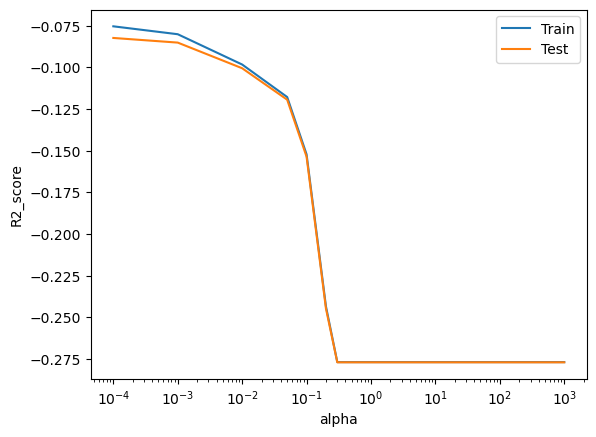

In [254]:
plot_r2_alpha(df_lasso)

As the value of alpha increases, we see a decrease in both train and test error.

However, after a error value of approximately 0.05, error remains constant.

[Back To Top🔝](#content0)
## 10. Evaluation Metrics for Ridge & Lasso<a name="content10"/>

In [255]:
# Creating a comparision table which contains all the metrics for ridge & lasso

pd.options.display.float_format = "{:,.3f}".format

lr_table = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metrics = pd.DataFrame(lr_table, columns = ['Metrics', 'Ridge Regression', 'Lasso Regression'] )
final_metrics.set_index('Metrics')

,Ridge Regression,Lasso Regression
Metrics,,
R2 Score (Train),0.903,0.905
R2 Score (Test),0.850,0.847
RSS (Train),11.889,11.710
RSS (Test),4.126,4.190
MSE (Train),0.012,0.012
MSE (Test),0.017,0.017
RMSE (Train),0.110,0.110
RMSE (Test),0.130,0.131


### Changes in the coefficients after regularization

In [256]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [257]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [258]:
betas

,Ridge,Lasso
LotFrontage,0.009,0.008
LotArea,0.017,0.018
YearRemodAdd,0.015,0.014
MasVnrArea,0.003,0.003
BsmtFinSF1,0.031,0.030
BsmtFinSF2,0.004,0.004
BsmtUnfSF,0.001,-0.000
TotalBsmtSF,0.038,0.038
1stFlrSF,0.028,0.019
2ndFlrSF,0.050,0.041


In [259]:
## Features removed by Lasso Regression
print("Features Removed - ",betas[betas['Lasso']==0].shape[0],"/",X.shape[1])

Features Removed -  6 / 62


In [260]:
## Features selected by Lasso Regression
betas[betas['Lasso']!=0].Lasso

LotFrontage       0.008
LotArea           0.018
YearRemodAdd      0.014
MasVnrArea        0.003
BsmtFinSF1        0.030
BsmtFinSF2        0.004
TotalBsmtSF       0.038
1stFlrSF          0.019
2ndFlrSF          0.041
LowQualFinSF     -0.009
GrLivArea         0.080
BsmtFullBath      0.014
BsmtHalfBath      0.001
FullBath          0.031
HalfBath          0.011
BedroomAbvGr     -0.009
KitchenAbvGr     -0.030
TotRmsAbvGrd      0.003
Fireplaces        0.016
GarageCars        0.024
GarageArea        0.009
WoodDeckSF        0.008
OpenPorchSF       0.008
EnclosedPorch     0.008
3SsnPorch         0.014
ScreenPorch       0.013
PoolArea          0.005
MiscVal          -0.001
MoSold            0.001
Age              -0.112
MSSubClass_45     0.049
MSSubClass_50     0.009
MSSubClass_60    -0.064
MSSubClass_70     0.052
MSSubClass_90    -0.016
MSSubClass_120   -0.004
MSSubClass_160   -0.118
MSSubClass_180   -0.094
MSSubClass_190    0.021
OverallQual_2    -0.287
OverallQual_3    -0.049
OverallQual_4   

[Back To Top🔝](#content0)
## 11. Conclusions<a name="content11"/>

### Top 10 significant features in Ridge

In [261]:
# To interpret the coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])

In [262]:
# Top 10 features in Ridge Regression
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9    1.375
OverallQual_10   1.303
OverallQual_8    1.247
OverallCond_9    1.235
OverallCond_8    1.145
OverallQual_7    1.135
OverallCond_7    1.132
OverallCond_6    1.073
GrLivArea        1.072
MSSubClass_70    1.071
Name: Ridge, dtype: float64

### Top 10 significant features in Lasso

In [263]:
# To interpret the coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])

In [264]:
# Top 10 features in Lasso Regression
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9    1.540
OverallQual_10   1.527
OverallQual_8    1.376
OverallCond_9    1.269
OverallQual_7    1.245
OverallCond_8    1.165
OverallQual_6    1.157
OverallCond_7    1.150
OverallQual_5    1.132
OverallCond_6    1.091
Name: Lasso, dtype: float64

<div class="observation" style='background-color:#6495ED;font-size:16px;padding:10px;color:white'>
    <p>
        <br>1. We can observe that the values of R2 Score, RSS, MSE and RMSE values of both Ridge and Lasso Regression are similar for both train & test datasets.
        <br>2. The optimal value of lambda for Ridge Regression is 1
        <br>3. The optimal value of lambda for Lasso Regression is 0.0001
        <br>4. The top features that are significant in predicting the price of a house are :
    <ul>
        For Ridge Regression:
        <ul><li><b>OverallQual_9</b></li>
        <li><b>OverallQual_10</b></li>
        <li><b>OverallQual_8</b></li>
        <li><b>OverallCond_9</b></li>
            <li><b>OverallCond_8</b></li></ul>
        For Lasso Regression:
        <ul><li><b>OverallQual_9</b></li>
        <li><b>OverallQual_10</b></li>
        <li><b>OverallQual_8</b></li>
        <li><b>OverallCond_9</b></li>
        <li><b>OverallQual_7</b></li></ul>
         So it is recommended to consider these significant features in predicting the price of a house.
    </ul>
    5. These top features describe the price of a house in the following way:
    <ul>
        <li><b>OverallQual_10, OverallQual_9, OverallQual_8 & OverallQual_7: <br/>If the overall material and finish of the house is Good, Very Good or Excellent, the price of house will increase by 1.13 to 1.54 times</b></li>
        <li><b>OverallCond_9, OverallCond_8 & OverallCond_7: <br/>If the overall condition of the house is Good, Very Good or Excellent, the price of house will increase by 1.04 to 1.10 times</b></li>
        <li><b>GrLivArea: <br/>As we increase 1 area square feet, the price of house will increase by 1.07 times</b></li>
        <li><b>MSSubClass_70: If the type of dwelling involved in the sale is 2-STORY 1945 & OLDER, the price of house will increase by 1.07 times<br/></b></li>
    </ul>
    So now, we can check how well each feature describes the price of a house in a similar way.
  
</div>